# Project: Graph of the estimated number of penguins in each species

In [28]:
# Standard imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
%matplotlib inline
import ssl



## Get Data

In [29]:
ssl._create_default_https_context = ssl._create_unverified_context

# Read the table from Wikipedia
wikipedia_page_url = "https://en.wikipedia.org/wiki/List_of_Sphenisciformes_by_population"

tables = pd.read_html(wikipedia_page_url)
penguin_data = tables[1]

## Clean the data

In [30]:
penguin_data.columns

Index(['Common name', 'Binomial name', 'Population', 'Status', 'Trend',
       'Notes', 'Image'],
      dtype='object')

In [31]:
penguin_data[['Population']].head()

,Population
0,1800[10]
1,3300 – 12 000[11]
2,5000 – 6000[12]
3,5930 – 6970[13]
4,75 000 – 80 000[14]


In [32]:
def clean_population(population):
    population = str(population).split('[')[0] # remove text inside []
    population = population.replace(',', '') # remove commas
    population = population.replace(' ', '') # remove spaces
    if '-' in population: # if there's a range, take the upper bound
        population = population.split('-')[1]
    return population

penguin_data.loc[:, 'Population'] = penguin_data['Population'].apply(clean_population)
penguin_data = penguin_data[penguin_data['Population'].str.isnumeric()]
penguin_data['Population'] = penguin_data['Population'].astype(int)

penguin_data.head()

/var/folders/hq/g489274d5y15844y8fwwc3bh0000gn/T/ipykernel_15385/804898900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguin_data['Population'] = penguin_data['Population'].astype(int)


,Common name,Binomial name,Population,Status,Trend,Notes,Image
0,Galapagos penguin,Spheniscus mendiculus,1800,EN[10],[10],NaN,NaN
5,Snares penguin,Eudyptes robustus,93000,VU[15],[15],NaN,NaN
7,Northern rockhopper penguin,Eudyptes moseleyi,530000,EN[17],[17],Only mature individuals were included in the c...,NaN
8,Emperor penguin,Aptenodytes forsteri,595000,NT[18],[18],NaN,NaN
9,Gentoo penguin,Pygoscelis papua,774000,LC[19],[19],Only mature individuals were included in the c...,NaN


In [33]:
penguin_data.columns

Index(['Common name', 'Binomial name', 'Population', 'Status', 'Trend',
       'Notes', 'Image'],
      dtype='object')

In [34]:
penguin_data = penguin_data[['Common name', 'Population']]
penguin_data.head()

,Common name,Population
0,Galapagos penguin,1800
5,Snares penguin,93000
7,Northern rockhopper penguin,530000
8,Emperor penguin,595000
9,Gentoo penguin,774000


## Clean and organize dataframe

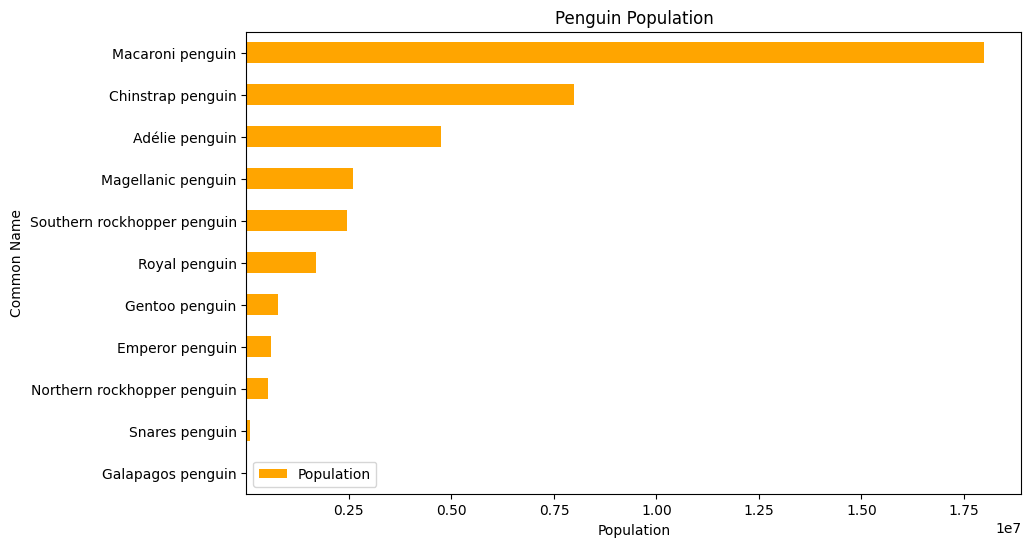

In [36]:
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

# Load the background image
img = plt.imread('penguin_bg.png')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Add the background image
ax.imshow(img, extent=[0, 1, 0, 1], aspect='auto')

# Plot the bar chart
penguin_data.plot(kind='barh', x='Common name', y='Population', ax=ax, color='orange')

# Set the title and axis labels
ax.set_title('Penguin Population')
ax.set_xlabel('Population')
ax.set_ylabel('Common Name')

# Show the plot
plt.show()

## Graph the data

In [ ]:
plt.plot(data)

## Conclusions


The data suggests...